# Portfolio Optimization

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as reader
import datetime as dt
from statsmodels import api as sm

### Importing and arranging the data on stock returns 

In [75]:
stocks = ['AAPL','MSFT','AMZN','GOOGL','TSLA','FB','NVDA','PYPL','NFLX','CMCSA','INTC','ADBE','PEP','CSCO','AVGO','QCOM','TMUS','COST','TXN','AMGN']
stock_list = []
end = dt.datetime.now()
start = dt.date(end.year-1,end.month,end.day) #getting data from past 1 year

for stock in stocks:
    data = reader.get_data_yahoo(stock,start,end) #getting data from yahoo finance
    data['returns'] = data['Close'].pct_change()
    
    data.rename(columns={'returns':stock},inplace=True)
    data = data[stock]
    stock_list.append(data)
    
stock_returns = pd.DataFrame(stock_list).transpose().iloc[1:]
stock_returns

,AAPL,MSFT,AMZN,GOOGL,TSLA,FB,NVDA,PYPL,NFLX,CMCSA,INTC,ADBE,PEP,CSCO,AVGO,QCOM,TMUS,COST,TXN,AMGN
Date,,,,,,,,,,,,,,,,,,,,
2020-12-31,-0.007703,0.003338,-0.008801,0.009440,0.015674,0.004745,-0.006903,0.011619,0.030767,0.023238,0.021949,0.005367,0.006721,0.006070,0.006945,0.015939,0.011780,0.006222,0.008789,0.012105
2021-01-04,-0.024719,-0.021266,-0.021585,-0.015126,0.034152,-0.015449,0.004481,-0.009735,-0.033048,-0.036069,-0.003011,-0.029553,-0.027175,-0.017654,-0.028846,-0.025207,-0.017946,0.008944,-0.011637,-0.014179
2021-01-05,0.012364,0.000965,0.010004,0.008064,0.007317,0.007548,0.022210,0.012892,-0.003940,-0.010493,0.018925,0.000721,0.002980,0.000455,0.006773,0.026465,-0.004380,-0.011601,0.007336,0.004853
2021-01-06,-0.033662,-0.025929,-0.024897,-0.009868,0.028390,-0.028269,-0.058953,-0.034396,-0.038998,0.011605,0.009682,-0.039902,-0.012232,0.009550,-0.006167,-0.008135,-0.002427,-0.015223,0.004957,0.024104
2021-01-07,0.034123,0.028457,0.007577,0.029869,0.079447,0.020622,0.057830,0.036194,0.016784,0.001978,0.021331,0.024512,-0.003218,0.012613,0.042143,0.029830,0.012621,-0.005675,0.022653,0.003301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.003644,0.004472,0.000184,0.003425,0.057619,0.014495,0.008163,0.001722,-0.000244,0.020396,0.006671,0.010000,-0.001118,0.012189,0.014652,0.007498,-0.005391,0.001274,0.002514,0.010202
2021-12-27,0.022975,0.023186,-0.008178,0.006738,0.025248,0.032633,0.044028,0.000000,-0.001580,0.008795,0.012278,0.014150,0.009954,0.018304,0.014260,0.019645,-0.011092,0.023802,0.023693,0.006167
2021-12-28,-0.005767,-0.003504,0.005844,-0.008245,-0.005000,0.000116,-0.020133,-0.009947,-0.003931,0.000792,-0.003466,-0.014402,0.005190,0.001734,-0.007831,-0.008104,-0.003542,0.002076,-0.003857,0.002665


### Forming combinations of portfolios of 5 stocks 

In [76]:
from itertools import combinations

input = stocks

output = sum([list(map(list, combinations(input, 5)))], [])
len(output)
    

15504

In [77]:
portfolio_list = []
for portfolio in output:
    stock_list = []
    data = []
    for stock in portfolio:
        stock_data = stock_returns[stock]
        stock_list.append(stock_data)
    portfolio_list.append(stock_list)

#Making a list of dataframes from portfolio_list
        
portfolio_df_list = []
i=0
for portfolio in portfolio_list:
    portfolio_df = pd.DataFrame()
    portfolio_df = pd.DataFrame(portfolio_list[i]).transpose()
    i=i+1
    portfolio_df_list.append(portfolio_df)
len(portfolio_df_list)
    

15504

### Calculating Portfolio risk of all portfolio combinations

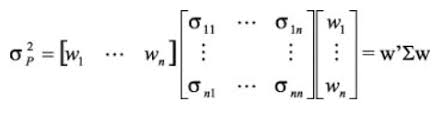

Lower covariance between the portfolio securities results in lower portfolio standard deviation hence we need to choose a portfolio with the least standard deviation.

In [78]:
weights = np.array([0.2,0.2,0.2,0.2,0.2])
i=0
portfolio_risk = []
for i in range(len(portfolio_df_list)):
    cov_matrix = portfolio_df_list[i]
    cov_matrix = (cov_matrix.cov())*252
    portfolio_variance = np.dot(weights.T,np.dot(cov_matrix, weights))
    portfolio_risk.append(np.sqrt(portfolio_variance))
portfolio_risk_df = pd.DataFrame(portfolio_risk)
portfolio_risk_df

,0
0,0.229218
1,0.201682
2,0.227649
3,0.209984
4,0.200917
...,...
15499,0.174452
15500,0.196573
15501,0.194394
15502,0.166628


### Result

In [80]:
i = portfolio_risk_df[0].idxmin()
print("The optimised portfolio with stocks having least correlation between them is:")
for j in range(len(output[i])):
 print(output[i][j])

The optimised portfolio with stocks having least correlation between them is:
AMZN
PEP
CSCO
COST
AMGN
